<a href="https://colab.research.google.com/github/shivjagtap18/Deep-Learning/blob/main/Handwritten_Digit_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit Classification CNN Project-SHIVANI JAGTAP

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the dataset

In [3]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### viewing first image from train data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

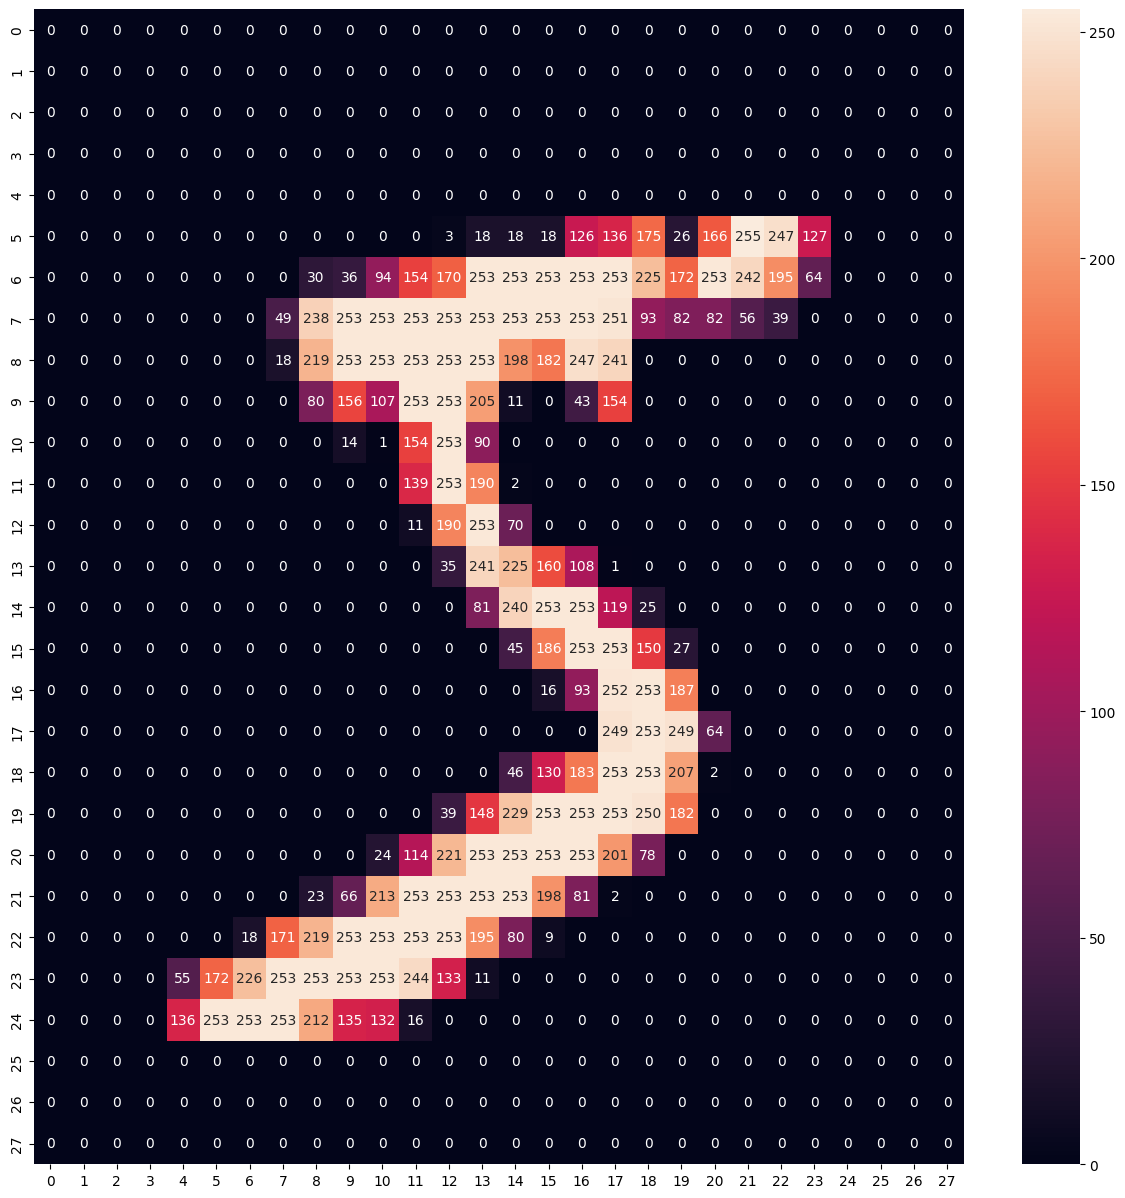

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()



In [10]:
ytrain[0]

5

In [11]:
xtrain[0].shape

(28, 28)

### Visulaize top 9 images from xtrain data

In [12]:
for i in range(9):
  print(i)


0
1
2
3
4
5
6
7
8


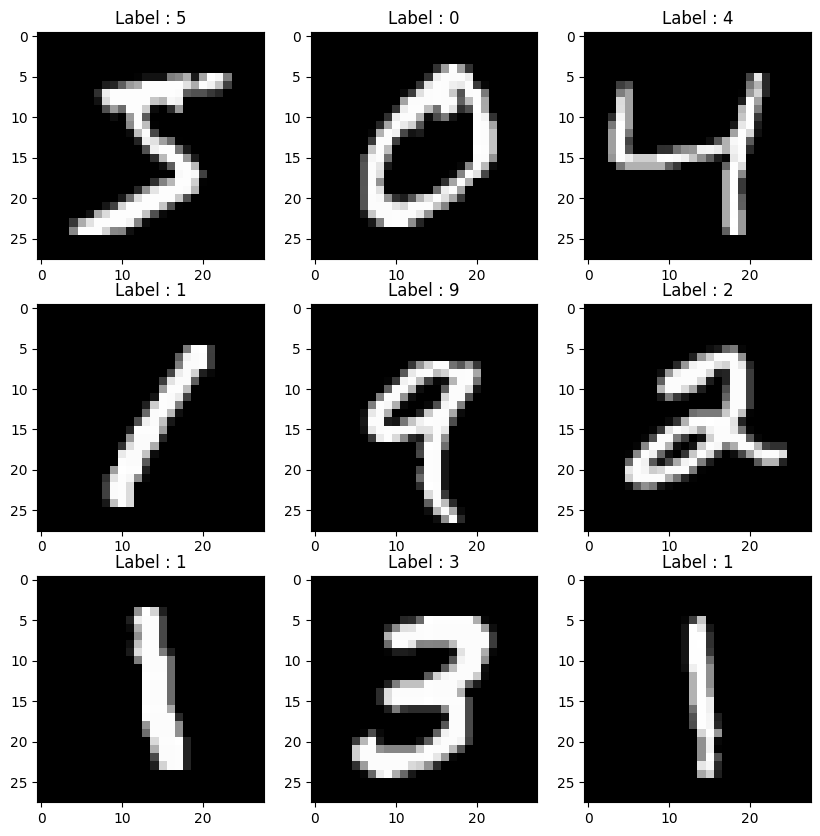

In [13]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Label : {ytrain[i]}')

In [14]:
import numpy as np
np.unique(ytrain)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
len(np.unique(ytrain))

10

### Because i have more than 2 classes above becomes a multiclass classification problem

###Preprocessing the data

In [16]:
# Scale the x data divide by 255
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [17]:
# Apply one hot encoding on target feature because it multiclasss classification problem
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [18]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Create a simple Covnet

## 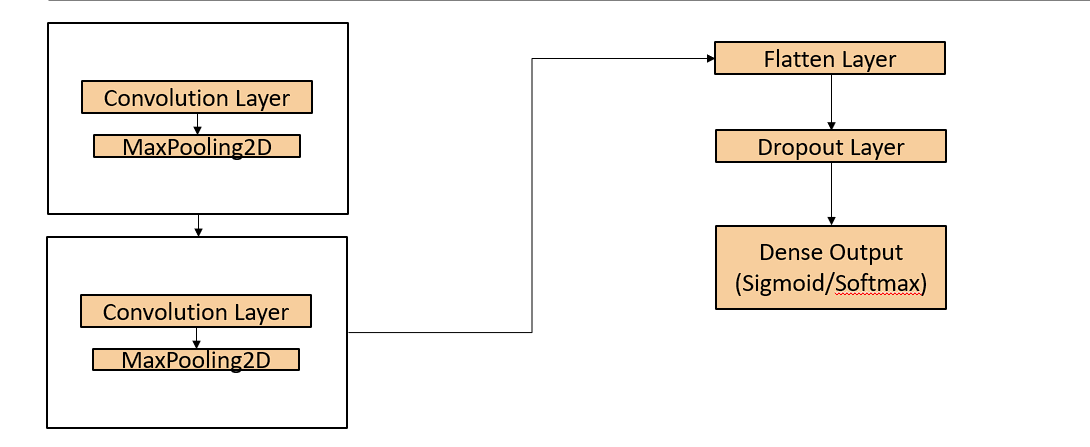

## 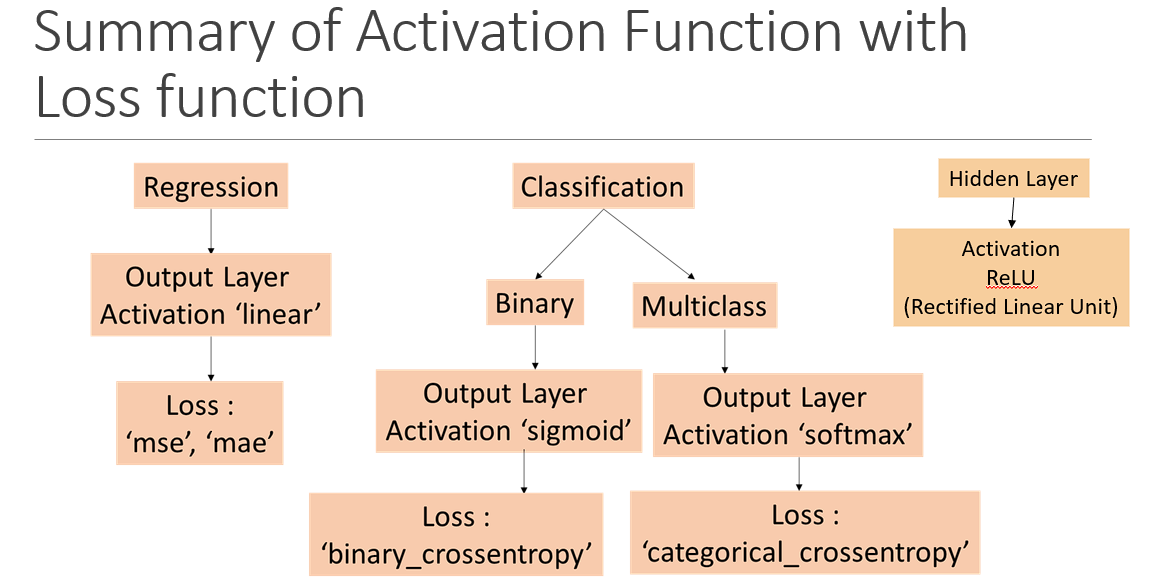

In [22]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense


In [23]:
model = Sequential()

# Add Input layer
model.add(Input(shape=(28, 28, 1)))
# Add convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# Add Maxpooling 1
model.add(MaxPool2D(pool_size=(2,2)))
# Add convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add Max Pooling 2
model.add(MaxPool2D(pool_size=(2,2)))
# Add flatten layer
model.add(Flatten())
# Dropout layer
model.add(Dropout(rate=0.5))
# Dense layer Multiclass- Softmax
model.add(Dense(units=10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Compile the model

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Train the neural net

In [26]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 13s 4ms/step - loss: 0.2269 - accuracy: 0.9294 - val_loss: 0.0667 - val_accuracy: 0.9812
Epoch 2/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0842 - accuracy: 0.9734 - val_loss: 0.0427 - val_accuracy: 0.9890
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0658 - accuracy: 0.9791 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 4/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0551 - accuracy: 0.9827 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.0320 - val_accuracy: 0.9905
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0445 - accuracy: 0.9854 - val_loss: 0.0304 - val_accuracy: 0.9915
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0301 - val_accuracy

### Plot the learning curve for the model

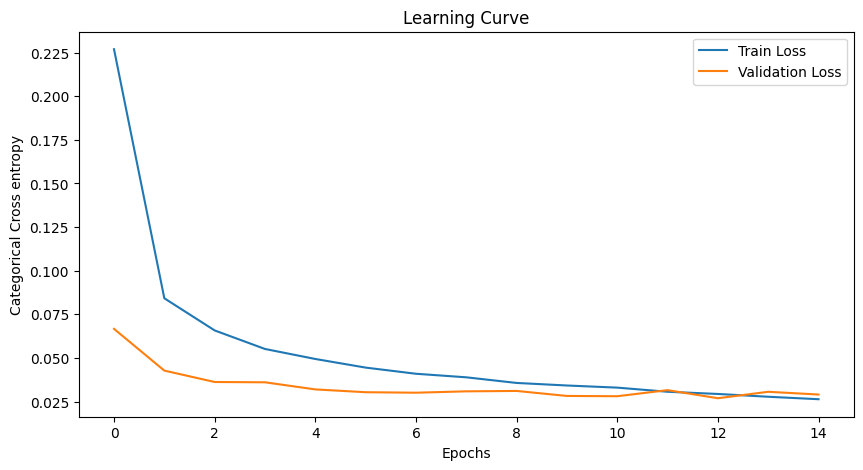

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model in train and test

In [28]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - accuracy: 0.9967


[0.01146826334297657, 0.9966833591461182]

In [29]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0242 - accuracy: 0.9921


[0.02422259747982025, 0.9921000003814697]

### Predict the probability for train and test

In [30]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [31]:
yprob_train[0:5]

array([[1.1068744e-13, 9.9439966e-13, 5.6210814e-11, 4.3526967e-03,
        2.7854539e-13, 9.9564701e-01, 5.3311806e-14, 1.3107301e-10,
        6.7588921e-09, 2.2224170e-07],
       [9.9999917e-01, 6.1685995e-16, 4.1424718e-07, 2.6792317e-11,
        4.8782905e-10, 6.6518235e-11, 6.4036463e-08, 1.0796444e-13,
        2.7949767e-07, 4.4449930e-08],
       [7.6607364e-16, 1.6335413e-07, 5.8323325e-11, 4.4188785e-12,
        9.9999869e-01, 2.1358653e-11, 8.9536871e-14, 8.7268432e-07,
        1.4778844e-09, 4.0368505e-07],
       [1.1806759e-07, 9.9980229e-01, 1.7725406e-06, 2.5302154e-09,
        1.0415480e-04, 1.1454542e-09, 3.3697512e-07, 6.7715800e-06,
        8.4358391e-05, 1.9718443e-07],
       [2.9806897e-11, 1.9612412e-11, 2.2614712e-09, 6.8036826e-08,
        1.5987057e-04, 2.4499016e-09, 7.1408333e-14, 7.4409553e-07,
        5.7997555e-04, 9.9925929e-01]], dtype=float32)

In [32]:
yprob_train[0]


array([1.1068744e-13, 9.9439966e-13, 5.6210814e-11, 4.3526967e-03,
       2.7854539e-13, 9.9564701e-01, 5.3311806e-14, 1.3107301e-10,
       6.7588921e-09, 2.2224170e-07], dtype=float32)

### Predictions for train and test

In [33]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)


In [34]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [35]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [37]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion matrix

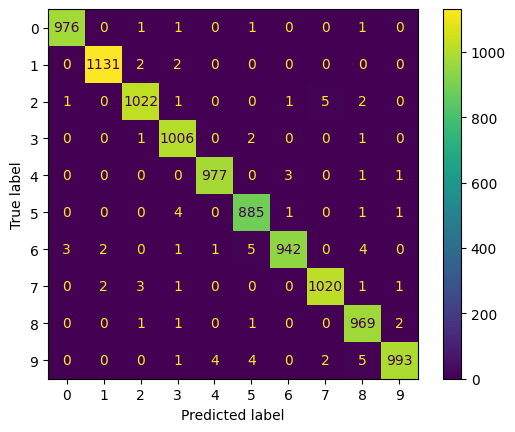

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the keras model for future use

In [40]:
model.save('HandwrittenModel.keras')


### Load the above model

In [41]:
from keras.models import load_model
m = load_model('/content/HandwrittenModel.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0